# TUTORIEL REGRESSION PENALISEE RIDGE

## LES DONNEES
 

In [4]:
import pandas as pd
import os
repertoire = "C:\\Users\\dgr\\OneDrive - Publicis Groupe\\Documents\\Formations\\SCU Python\\NEW\\data"

os.chdir(repertoire)
iris = pd.read_csv("irisHTTP.csv",sep=',',header=None,encoding='latin-1')
# on définit les colonnes
iris.columns = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth', 'species']

## EXPLORATION


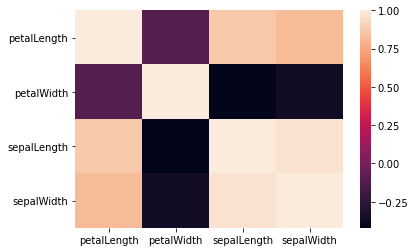

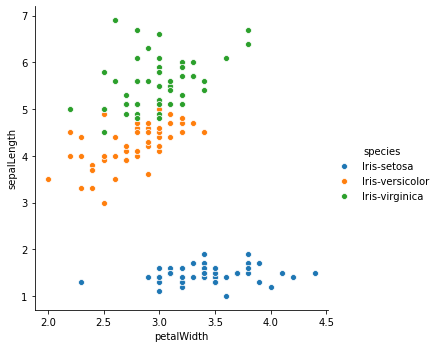

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# corrélations
#plt.matshow(iris.corr())
import seaborn as sns
corr = iris.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

# étude de sepalLength
sns.pairplot(x_vars='petalWidth', y_vars='sepalLength', data=iris, hue="species", size=5)

# on va séparer en deux groupes et étudier que les non setosa

X = iris.loc[iris.species != 'Iris-setosa',['petalLength', 'petalWidth', 'sepalWidth']]
y = iris[iris.species != 'Iris-setosa'].sepalLength

## REG LIN SIMPLE


In [7]:

# Régression linéaire simple
# quel est le signe de petal.width pour expliquer sepalLength
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.__dict__
# 2D array nécessaire pour les X même si une seule feature
X_petalWidth=np.array(X['petalWidth']).reshape(len(X.petalWidth), 1)
reg.fit(X_petalWidth,y)
reg.__dict__
sepalLength_pred =reg.predict(X_petalWidth)


C:\Users\dgr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


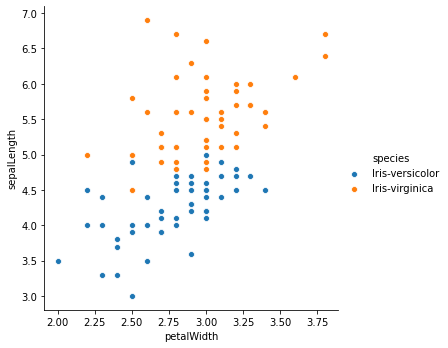

In [8]:

sns.pairplot(x_vars='petalWidth', y_vars='sepalLength', data=iris[iris.species != 'Iris-setosa'], hue="species", size=5)


In [9]:

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

print('Coefficients: \n', reg.coef_)
# The coefficient : 1.29 * petalWidth (cotnre -1.71 au global)
print("root Mean squared error: %.2f" % sqrt(mean_squared_error(y, sepalLength_pred)))
print('Variance score: %.2f' % r2_score(y, sepalLength_pred))


Coefficients: 
 [1.28966574]
root Mean squared error: 0.70
Variance score: 0.27


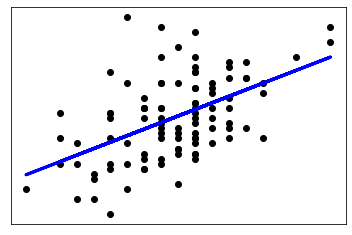

In [10]:

import matplotlib.pyplot as plt
# nuage de points X, y
plt.figure()
plt.scatter(X_petalWidth, y,  color='black')
plt.plot(X_petalWidth, sepalLength_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

## REGRESSION LIN MULTIPLE SUR DES DONNEES CORRELEES

In [12]:
# rég linéaire multiple sur données corrélées
reg = linear_model.LinearRegression()
reg.fit(X,y)
print(pd.DataFrame({'Coefficients': list(reg.coef_)}, list(X.columns.values)))

#  quand on explique la variation de Y par les 3 var, le signe de Petal.Width devient neg ! -0.25
# CONCLUSION : la rég linéaire donne des résultats biaisés en présence de COLLINEARITE (corrélations multivariées)

             Coefficients
petalLength      0.695178
petalWidth      -0.247895
sepalWidth       1.066154


In [13]:
print('Variance score: %.2f' % r2_score(y, reg.predict(X)))

Variance score: 0.86


In [14]:
# Si on enleve une variable
reg = linear_model.LinearRegression()
reg.fit(X[["sepalWidth","petalLength"]],y)
print(pd.DataFrame({'Coefficients': list(reg.coef_)}, list(X[["sepalWidth","petalLength"]].columns.values)))

print('Variance score: %.2f' % r2_score(y, reg.predict(X[["sepalWidth","petalLength"]])))

             Coefficients
sepalWidth       0.994963
petalLength      0.653339
Variance score: 0.86


## REGRESSION LINEAIRE MULTIPLE RIDGE SUR DES DONNEES CORRELEES

In [15]:
# la régression ridge permet de garder tous les prédicteurs en evitant que les coeff
# prennent des valeurs contradictoires pour compenser les corrélations
from sklearn import linear_model
ridge = linear_model.Ridge (alpha = 25)
ridge.fit(X,y)
print(pd.DataFrame({'Coefficients': list(ridge.coef_)}, list(X.columns.values)))

             Coefficients
petalLength      0.527753
petalWidth       0.118419
sepalWidth       0.441238


In [17]:
# On augmente le coefficient pour augmenter la pénalisation et voir son impact (schrinkage)
from sklearn import linear_model
ridge = linear_model.Ridge (alpha = 500)
ridge.fit(X,y)
print(pd.DataFrame({'Coefficients': list(ridge.coef_)}, list(X.columns.values)))

             Coefficients
petalLength      0.080436
petalWidth       0.024953
sepalWidth       0.052245
